In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

In [2]:
import sys
sys.path.append("../") # go to parent dir

### 12.3 Estimating Parameters of a Stationary Process

In [9]:
data = pd.read_csv('../data/Mishkin.csv', usecols=list(range(1, 7)), index_col=0)
data.head()

,pai1,pai3,tb1,tb3,cpi
Year,,,,,
1950.083333,-3.552289,1.129370,1.100854,1.129406,23.5
1950.166667,5.247540,4.001566,1.125513,1.137254,23.6
1950.250000,1.692860,4.492160,1.115715,1.142319,23.6
1950.333333,5.064298,7.817513,1.146380,1.177902,23.7
1950.416667,6.719322,9.433580,1.158520,1.167777,23.8


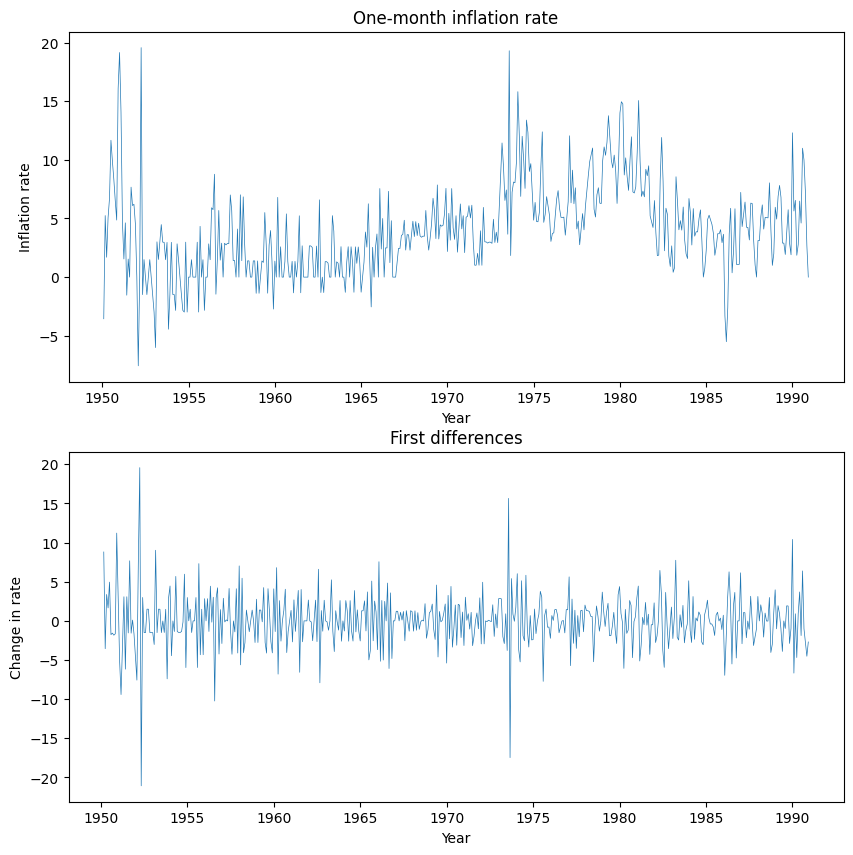

In [15]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

axs[0].plot(data['pai1'], linewidth=0.5);
axs[0].set_title('One-month inflation rate');
axs[0].set_xlabel('Year');
axs[0].set_ylabel('Inflation rate');

axs[1].plot(data['pai1'].diff(), linewidth=0.5);
axs[1].set_title('First differences');
axs[1].set_xlabel('Year');
axs[1].set_ylabel('Change in rate');

In [17]:
import statsmodels.graphics.tsaplots as tsaplots

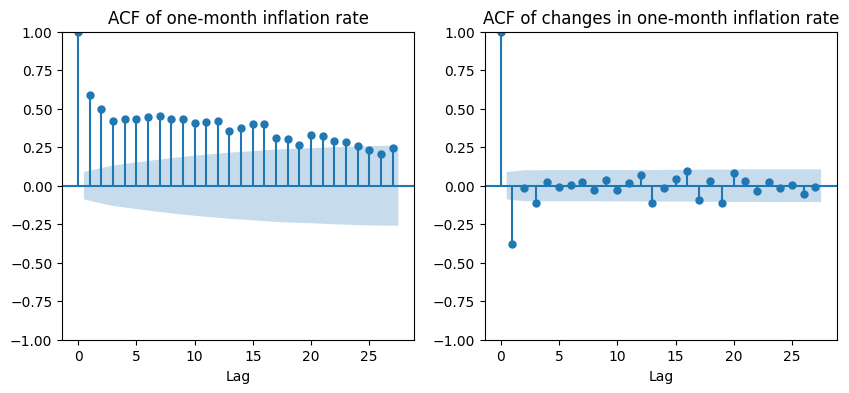

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

tsaplots.plot_acf(data['pai1'], ax=axs[0]);
axs[0].set_title('ACF of one-month inflation rate');
axs[0].set_xlabel('Lag');

tsaplots.plot_acf(data['pai1'].diff().dropna(), ax=axs[1]);
axs[1].set_title('ACF of changes in one-month inflation rate');
axs[1].set_xlabel('Lag');

In [23]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [25]:
acorr_ljungbox(data['pai1'].diff().dropna(), lags=[10])

,lb_stat,lb_pvalue
10,79.915125,5.216492e-13


### 12.5 Estimation of AR(1) Processes

In [32]:
data = pd.read_csv('../data/bmw.csv', usecols=[1, 2], index_col=0, parse_dates=[0])
data.head()

,bmw
date,
1973-01-02,0.047704
1973-01-03,0.007127
1973-01-04,0.008883
1973-01-05,-0.012441
1973-01-08,-0.003570


In [33]:
acorr_ljungbox(data['bmw'], lags=[5])

,lb_stat,lb_pvalue
5,44.987013,1.459724e-08


In [36]:
mod = sm.tsa.arima.ARIMA(data['bmw'].values, order=(1, 0, 0))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6146
Model:                 ARIMA(1, 0, 0)   Log Likelihood               17212.341
Date:                Tue, 04 Apr 2023   AIC                         -34418.683
Time:                        14:37:57   BIC                         -34398.512
Sample:                             0   HQIC                        -34411.687
                               - 6146                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.646      0.100   -6.45e-05       0.001
ar.L1          0.0810      0.008     10.553      0.000       0.066       0.096
sigma2         0.0002   1.81e-06    119.096      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             13370.13
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.00
Prob(H) (two-sided):                  0.06   Kurtosis:                        10.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
acorr_ljungbox(res.resid, lags=[5], model_df=1)

,lb_stat,lb_pvalue
5,6.865557,0.143166
